In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns 
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_excel("./data/Abnormality.xls")
data_frame = data_frame.T
data_frame.head()

0         1         2         3         4         5    \
abnormality1  0.193085  0.452288  0.415949  0.139162  0.193064  0.473900   
abnormality2  0.455707  0.400769  0.232735  0.043859  0.171187  0.397085   
abnormality3  0.216496  0.322787  0.321861  0.025466  0.351955  0.304562   
abnormality4  0.103720  0.287073  0.297168  0.069759  0.341625  0.322145   
abnormality5  0.180818  0.309175  0.204455  0.213910  0.257745  0.465277   

                   6         7         8         9    ...       109       110  \
abnormality1  0.453628  0.226506  0.486974  0.202100  ...  0.325062  0.390048   
abnormality2  0.435364  0.198269  0.478201  0.271058  ...  0.415000  0.152374   
abnormality3  0.190576  0.242715  0.059984  0.194685  ...  0.588951  0.264538   
abnormality4  0.197875  0.327782  0.683889  0.036612  ...  0.219669  0.205674   
abnormality5  0.274290  0.177519  0.218036  0.122765  ...  0.199044  0.056704   

                   111       112       113       114       115       116  \
abnormality1  0.068589  0.239278  0.325062  0.221802  0.325062  0.112128   
abnormality2  0.009217  0.231085  0.415000  0.130759  0.415000  0.085114   
abnormality3  0.233772  0.360888  0.588951  0.343463  0.588951  0.207494   
abnormality4  0.121860  0.140276  0.219669  0.043324  0.219669  0.016444   
abnormality5  0.122244  0.547757  0.199044  0.273875  0.199044  0.468982   

                   117  118  
abnormality1  0.068589  1.0  
abnormality2  0.009217  1.0  
abnormality3  0.233772  1.0  
abnormality4  0.121860  0.0  
abnormality5  0.122244  1.0  

[5 rows x 119 columns]

In [3]:
#get datas where, target == 0
data_zero = data_frame[data_frame[118] == 0]
#get datas where, target == 1
data_one = data_frame[data_frame[118] == 1]

###### for class zero

In [4]:
features = data_zero.drop(118, axis = 1)
features.shape

(73, 118)

In [5]:
# determine the covariance matrix
cov = features.cov()
cov.shape

(118, 118)

In [6]:
cov

0         1         2         3         4         5         6    \
0    0.017708  0.004065  0.005516  0.001856 -0.000555  0.002534  0.004143   
1    0.004065  0.026479 -0.002807 -0.000479  0.003225  0.002157 -0.005694   
2    0.005516 -0.002807  0.021936  0.000801 -0.003791  0.001023  0.002674   
3    0.001856 -0.000479  0.000801  0.006872  0.000187  0.000207  0.000256   
4   -0.000555  0.003225 -0.003791  0.000187  0.008245  0.000898 -0.003876   
..        ...       ...       ...       ...       ...       ...       ...   
113 -0.004380  0.002571 -0.006964 -0.002545  0.001477  0.002349 -0.008086   
114  0.001959 -0.001742  0.004317 -0.000360 -0.002171 -0.001013  0.002598   
115 -0.004380  0.002571 -0.006964 -0.002545  0.001477  0.002349 -0.008086   
116 -0.003234 -0.000552 -0.009861  0.000275  0.001152 -0.000158 -0.000583   
117  0.000392  0.009094 -0.009787  0.000331  0.005705 -0.001116 -0.000743   

          7         8         9    ...       108       109       110  \
0    0.001211 -0.003649 -0.000021  ...  0.000787 -0.004380 -0.007208   
1   -0.003124 -0.006380  0.013775  ... -0.000926  0.002571  0.001525   
2    0.007760  0.000706 -0.015982  ...  0.001445 -0.006964 -0.013308   
3   -0.001229 -0.001168  0.002987  ...  0.000377 -0.002545 -0.001956   
4   -0.001860  0.000339  0.009834  ... -0.000958  0.001477  0.003174   
..        ...       ...       ...  ...       ...       ...       ...   
113 -0.003330  0.005104  0.006578  ... -0.001378  0.037825  0.006756   
114  0.003276 -0.000634 -0.006780  ...  0.005018 -0.003495 -0.002303   
115 -0.003330  0.005104  0.006578  ... -0.001378  0.037825  0.006756   
116 -0.004358  0.000971  0.006208  ...  0.000722  0.004461  0.008415   
117 -0.004922 -0.007556  0.021996  ... -0.001335 -0.000701  0.005256   

          111       112       113       114       115       116       117  
0    0.000392  0.000770 -0.004380  0.001959 -0.004380 -0.003234  0.000392  
1    0.009094 -0.002393  0.002571 -0.001742  0.002571 -0.000552  0.009094  
2   -0.009787  0.008447 -0.006964  0.004317 -0.006964 -0.009861 -0.009787  
3    0.000331 -0.000971 -0.002545 -0.000360 -0.002545  0.000275  0.000331  
4    0.005705 -0.003774  0.001477 -0.002171  0.001477  0.001152  0.005705  
..        ...       ...       ...       ...       ...       ...       ...  
113 -0.000701 -0.003760  0.037825 -0.003495  0.037825  0.004461 -0.000701  
114 -0.004472  0.006197 -0.003495  0.007359 -0.003495  0.000030 -0.004472  
115 -0.000701 -0.003760  0.037825 -0.003495  0.037825  0.004461 -0.000701  
116  0.000178 -0.002448  0.004461  0.000030  0.004461  0.010042  0.000178  
117  0.028552 -0.010225 -0.000701 -0.004472 -0.000701  0.000178  0.028552  

[118 rows x 118 columns]

In [7]:
#calculate Eigenvalues and EigenVectors
eigen_vals, eigen_vecs = np.linalg.eig(cov)
print(*[ float(d) for d in eigen_vals[0:5]])

1.3253409713024906 0.49316731492023874 0.27916473027424676 0.20031362178807022 0.1499478363300053


In [8]:
eigen_vecs

array([[-0.02096604+0.j, -0.0778614 +0.j,  0.04219628+0.j, ...,
        -0.01033995+0.j, -0.00983196+0.j, -0.04292639+0.j],
       [ 0.04702684+0.j, -0.06871296+0.j,  0.06188418+0.j, ...,
        -0.01050381+0.j, -0.00377276+0.j, -0.02353634+0.j],
       [-0.08311728+0.j, -0.05374958+0.j, -0.0544194 +0.j, ...,
         0.00132707+0.j,  0.00737712+0.j,  0.02478447+0.j],
       ...,
       [ 0.04504255+0.j,  0.10420242+0.j, -0.14095337+0.j, ...,
         0.00311341+0.j, -0.00842602+0.j, -0.0203793 +0.j],
       [ 0.04260519+0.j,  0.04372261+0.j, -0.0268783 +0.j, ...,
         0.01403576+0.j, -0.00101905+0.j,  0.01930369+0.j],
       [ 0.07589166+0.j, -0.01694235+0.j,  0.18903194+0.j, ...,
         0.00135138+0.j, -0.01358394+0.j, -0.03336804+0.j]])

In [9]:
#get the total of the eigen values
total = float(sum(eigen_vals))
# calculate the percentages of the eigen values
var_exp = [(float(i)/total)*100 for i in eigen_vals]
# get the cumulative sum of the percentages
cum_sum_var_exp = np.cumsum(var_exp)
#make pairs of eigen values with their corresponding eigen vectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#sort the eigen pairs based on the eigen value in a decreasing order
eigen_pairs.sort(key = lambda k : k[0], reverse=True)

In [10]:
# reduced pricipal components
# we are working with first three
reduced_pc = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))

In [11]:
# embedded vector
emb_zero = features.dot(reduced_pc)
emb_zero

0                   1                   2
abnormality4  -1.008465+0.000000j  0.916721+0.000000j -0.472012+0.000000j
abnormality7  -0.927632+0.000000j  1.268610+0.000000j -0.035386+0.000000j
abnormality8  -0.339884+0.000000j  1.241114+0.000000j -0.148265+0.000000j
abnormality9  -0.176996+0.000000j  1.486003+0.000000j -0.870135+0.000000j
abnormality10 -0.701928+0.000000j  1.487815+0.000000j -0.258142+0.000000j
...                           ...                 ...                 ...
abnormality93 -0.938696+0.000000j -1.008315+0.000000j -0.640381+0.000000j
abnormality94 -1.051341+0.000000j -0.202596+0.000000j -0.490695+0.000000j
abnormality95 -0.810837+0.000000j -0.939175+0.000000j -0.510214+0.000000j
abnormality96 -0.809218+0.000000j -0.733191+0.000000j -1.073242+0.000000j
abnormality97 -0.271455+0.000000j -0.701500+0.000000j -1.155228+0.000000j

[73 rows x 3 columns]

##### for class one

In [12]:
features = data_one.drop(118, axis = 1)
features.shape

(24, 118)

In [13]:
# determine the covariance matrix
cov = features.cov()
cov.shape

(118, 118)

In [14]:
#calculate Eigenvalues and EigenVectors
eigen_vals, eigen_vecs = np.linalg.eig(cov)
print(*[ float(d) for d in eigen_vals[0:5]])

1.301183472297004 0.4643836665675911 0.42049015493977554 0.19124089554027937 0.1698826872242149


In [15]:
#get the total of the eigen values
total = float(sum(eigen_vals))
# calculate the percentages of the eigen values
var_exp = [(float(i)/total)*100 for i in eigen_vals]
# get the cumulative sum of the percentages
cum_sum_var_exp = np.cumsum(var_exp)
#make pairs of eigen values with their corresponding eigen vectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#sort the eigen pairs based on the eigen value in a decreasing order
eigen_pairs.sort(key = lambda k : k[0], reverse=True)
# reduced pricipal components
# we are working with first three
reduced_pc = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
# embedded vector
emb_one = features.dot(reduced_pc)
emb_one

0                   1                   2
abnormality1  -1.017156+0.000000j -1.440721+0.000000j  0.810682+0.000000j
abnormality2  -0.979072+0.000000j -1.090670+0.000000j  1.394658+0.000000j
abnormality3  -0.719150+0.000000j -1.144703+0.000000j  1.470771+0.000000j
abnormality5  -1.414881+0.000000j -0.865494+0.000000j  1.554274+0.000000j
abnormality6  -0.956522+0.000000j -1.196695+0.000000j  0.795300+0.000000j
abnormality12 -1.198351+0.000000j -0.376745+0.000000j  2.158867+0.000000j
abnormality21  1.403837+0.000000j -0.910612+0.000000j  1.728202+0.000000j
abnormality40  1.761463+0.000000j -0.714383+0.000000j  2.219830+0.000000j
abnormality43  1.625420+0.000000j -0.815865+0.000000j  1.037109+0.000000j
abnormality44  1.753904+0.000000j -1.727485+0.000000j  1.139981+0.000000j
abnormality46  1.534457+0.000000j  0.056195+0.000000j  1.974061+0.000000j
abnormality50  1.289718+0.000000j -0.598234+0.000000j  0.960104+0.000000j
abnormality52  1.357937+0.000000j -0.153016+0.000000j  0.356910+0.000000j
abnormality54  0.357256+0.000000j  0.266342+0.000000j  1.990714+0.000000j
abnormality55  1.218471+0.000000j  0.856811+0.000000j  1.783296+0.000000j
abnormality57  1.350560+0.000000j -1.465085+0.000000j  1.129062+0.000000j
abnormality62  1.590455+0.000000j -1.016468+0.000000j  1.799327+0.000000j
abnormality70  1.575921+0.000000j -1.494851+0.000000j  0.895539+0.000000j
abnormality74  1.661359+0.000000j -0.864223+0.000000j  1.040554+0.000000j
abnormality75  0.295429+0.000000j  0.681784+0.000000j -0.708538+0.000000j
abnormality80  1.200647+0.000000j -0.705152+0.000000j  1.892719+0.000000j
abnormality82  0.851451+0.000000j -0.977377+0.000000j  1.123648+0.000000j
abnormality84  1.609634+0.000000j -1.555685+0.000000j  1.147144+0.000000j
abnormality86  2.034250+0.000000j -0.968223+0.000000j  0.976286+0.000000j

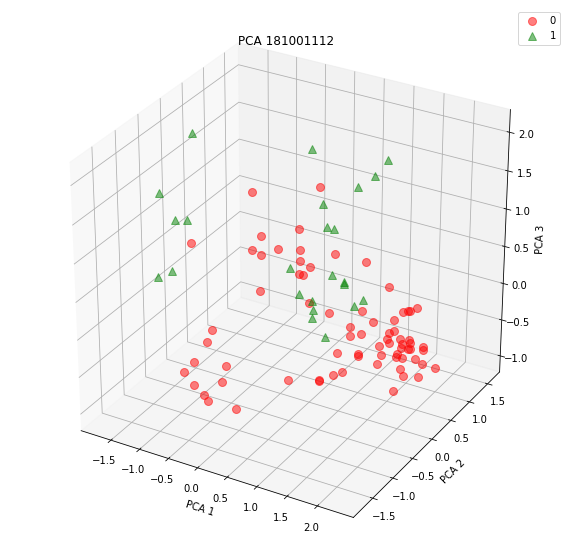

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(emb_zero[:][0], emb_zero[:][1], emb_zero[:][2], 'o', markersize = 8, alpha = 0.5, color = 'red', label = "0")
ax.plot(emb_one[:][0], emb_one[:][1], emb_one[:][2], '^', markersize = 8, alpha = 0.5, color = 'green', label = "1")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend(loc =  'upper right')
plt.title("PCA 181001112")
plt.savefig("pca.png")
plt.show()